<img src="kit_logo.jpg" width="200" height="200" align="right"/>

##### Lehrstuhl für Analytics and Statistics (IOR)
##### Prof. Dr. Oliver Grothe
##### SS 2020

# Multivariate Verfahren
## Übung 7

### Aufgabe 5

Verwenden Sie den Datensatz *`iris.csv`* aus Ilias, den Sie bereits bei der Multiplen
Linearen Regression kennen gelernt haben. Dieser enthält vier Merkmale von Blütenblättern
unterschiedlicher Schwertlilienarten (jeweils Länge und Breite des Sepalum (Kelchblatt) und
Petalum(Kronblatt)).

Führen Sie eine hierarchische Clusteranalyse durch. Wie viele unterschiedliche
Schwertlilienarten sind Ihrer Meinung nach im Datensatz vertreten?

#### Datenvorbereitung

<!-- - Daten einlesen: -->

- Daten einlesen:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
iris = pd.read_csv("iris.csv",sep=',',header=None)
iris.columns=['Kelchblattlänge', 'Kelchblattbreite', 'Kronblattlänge', 'Kronblattbreite']
iris

,Kelchblattlänge,Kelchblattbreite,Kronblattlänge,Kronblattbreite
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- Scatter Plot:

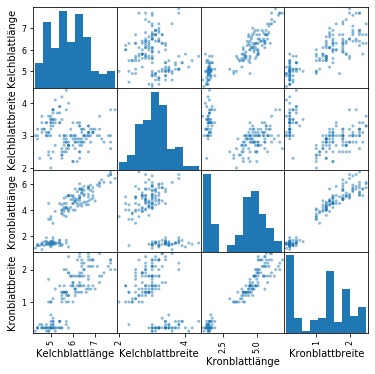

In [2]:
scatterplot=scatter_matrix(iris, alpha=0.5, figsize=(6, 6), diagonal='hist')
plt.show()

#### Clusteranalyse

- Model festlegen und anpassen

In [3]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(iris) #4 cluster, Recursively merges the pair of clusters that minimally increases a given linkage distance.
clustering


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [4]:
c=clustering.labels_
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

- Dendrogram

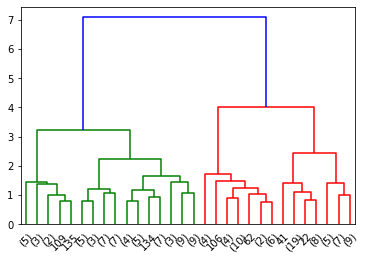

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(iris, 'complete',metric='euclidean')
plt.figure()
dn =dendrogram(Z, p=30, truncate_mode='lastp') # make the last p link nodes into leaf nodes, and only these p nodes will be visible.